# Fourier Transform - from Density to Scattering

Since these explanations are beyond the scope of this book, we take the following relationships, depicted below, for granted:

1. The scattering curve is a circular average of the detector image.
2. The detector image is a spherical average of the squared absolute values in reciprocal space.
3. The reciprocal space is obtained by applying a Fourier transform to the real space.

Confirm each relationship in the code. 

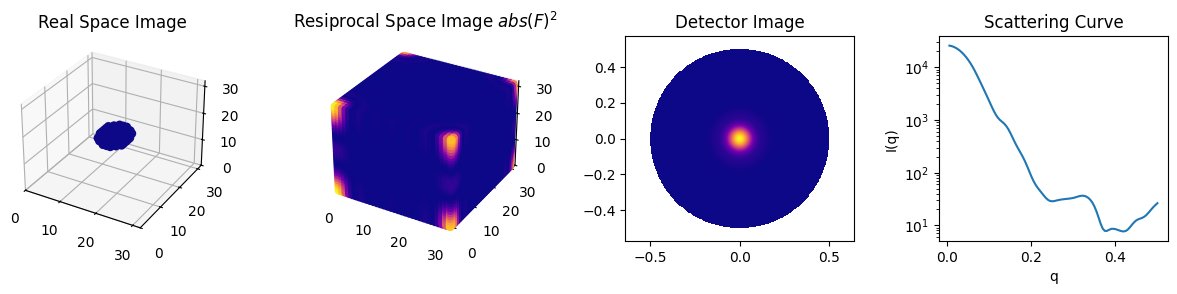

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from learnsaxs import draw_voxles_as_dots, get_detector_info, draw_detector_image

def plot_an_ellipsoid_with_ft_squared_and_detector_image(N, center, a, b, c):
    x = y = z = np.arange(N)
    xx, yy, zz = np.meshgrid(x, y, z)

    cx, cy, cz = center
    shape = (xx - cx)**2/a**2 + (yy - cy)**2/b**2 + (zz - cz)**2/c**2 < 1
    canvas = np.zeros((N,N,N))
    canvas[shape] = 1    # density inside the ellipsoid is 1, outside 0
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(141, projection="3d")
    ax2 = fig.add_subplot(142, projection="3d")
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    ax4.set_yscale("log")
    ax1.set_title("Real Space Image")
    ax2.set_title("Resiprocal Space Image $abs(F)^2$")
    ax3.set_title("Detector Image")
    ax4.set_title("Scattering Curve")
    draw_voxles_as_dots(ax1, canvas)

    # relation 3: Fourier transform
    F = np.fft.fftn(canvas)

    # relation 2: reciprocal space image
    ft_image = np.abs(F)
    draw_voxles_as_dots(ax2, ft_image**2)

    # relation 2 and 1: detector image and scattering curve
    # the spherical average and circular average is done in get_detector_info
    q = np.linspace(0.005, 0.5, 100)
    info = get_detector_info(q, F)

    # here, detector image is generated from the scattering curve
    # for illustration purpose which is the reverse of relation 1
    draw_detector_image(ax3, q, info.y)
    ax4.set_xlabel("q")
    ax4.set_ylabel("I(q)")
    ax4.plot(q, info.y)
    ax1.set_xlim(ax2.get_xlim())
    ax1.set_ylim(ax2.get_ylim())
    ax1.set_zlim(ax2.get_zlim())
    fig.tight_layout()

plot_an_ellipsoid_with_ft_squared_and_detector_image(32, (16,16,16), 5, 4, 2)

We can confirm the above relationships by computing the scattering curve in two ways: using the analytical formula and by direct Fourier transform, as shown below.

Text(0.5, 0, 'q (1/Å)')

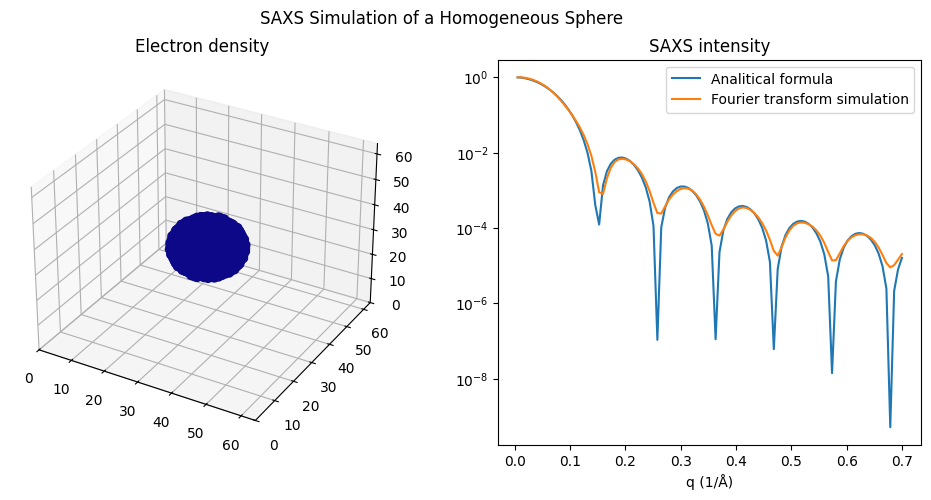

In [2]:
from molass import get_version
assert get_version() >= '0.6.0', "This tutorial requires molass version 0.6.0 or higher."
import numpy as np
import matplotlib.pyplot as plt
from molass.Shapes import Sphere
from molass.DensitySpace import VoxelSpace
from molass.SAXS.Simulator import compute_saxs
from molass.SAXS.Models.Formfactors import homogeneous_sphere
# %matplotlib widget

q = np.linspace(0.005, 0.7, 100)
R = 10
I = homogeneous_sphere(q, 3*R)  # why 3*R?

sphere = Sphere(radius=10)
space = VoxelSpace(64, sphere)
saxs = compute_saxs(space.rho, q=q, dmax=64)

fig = plt.figure(figsize=(12, 5))
fig.suptitle('SAXS Simulation of a Homogeneous Sphere')
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Electron density')
space.plot_as_dots(ax1)

ax2 = fig.add_subplot(122)
ax2.set_title('SAXS intensity')
ax2.set_yscale('log')
ax2.plot(q, I, label='Analitical formula')
curve = saxs.get_curve()
ax2.plot(q, curve.y, label='Fourier transform simulation')
ax2.legend()
ax2.set_xlabel('q (1/Å)')

In [3]:
from molass.Shapes import Ellipsoid
from molass.DensitySpace import VoxelSpace
from molass.SAXS.Simulator import compute_saxs
from molass.SAXS.Models.Formfactors import tri_axial_ellipsoid

def plot_tri_axial_ellipsoid(a, b, c):
    I = tri_axial_ellipsoid(q, 3*a, 3*b, 3*c)   # why 3*a, 3*b, 3*c?
    ellipsoid = Ellipsoid(a, b, c)
    space = VoxelSpace(64, ellipsoid)
    saxs = compute_saxs(space.rho, q=q, dmax=64)

    fig = plt.figure(figsize=(12, 5))
    fig.suptitle('SAXS Simulation of a Tri-axial Ellipsoid')
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title('Electron density')
    space.plot_as_dots(ax1)

    ax2 = fig.add_subplot(122)
    ax2.set_title('SAXS intensity')
    ax2.set_yscale('log')
    ax2.plot(q, I, label='Tri-axial Ellipsoid')
    curve = saxs.get_curve()
    ax2.plot(q, curve.y, label='Fourier transform simulation')
    ax2.legend()
    ax2.set_xlabel('q (1/Å)')

With the current state of the code, the calculation for an ellipsoid may be inaccurate (see the next plot), while it appears correct when the semi-axes are equal (i.e., $ a=b=c $, as in the followed plot resulting in a sphere).

```{note}
The code is for illustration purposes only and is not used in real analysis.
```

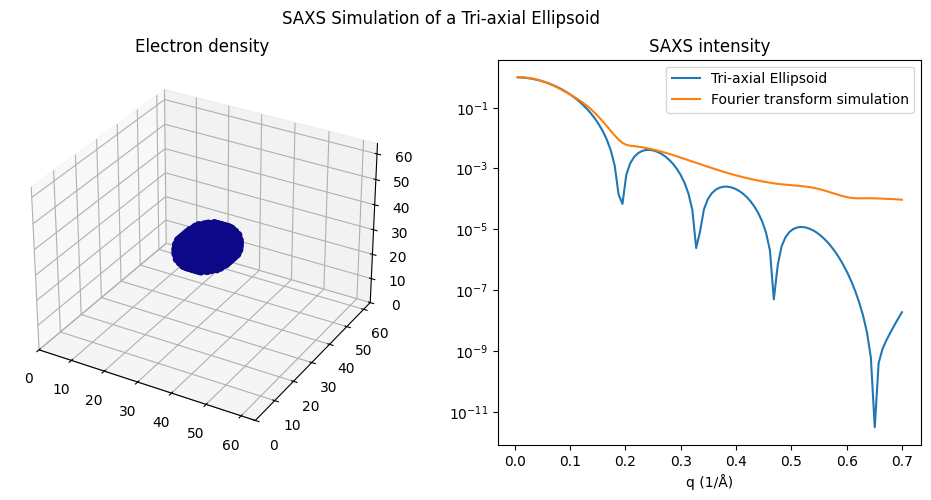

In [4]:
plot_tri_axial_ellipsoid(10, 8, 6)

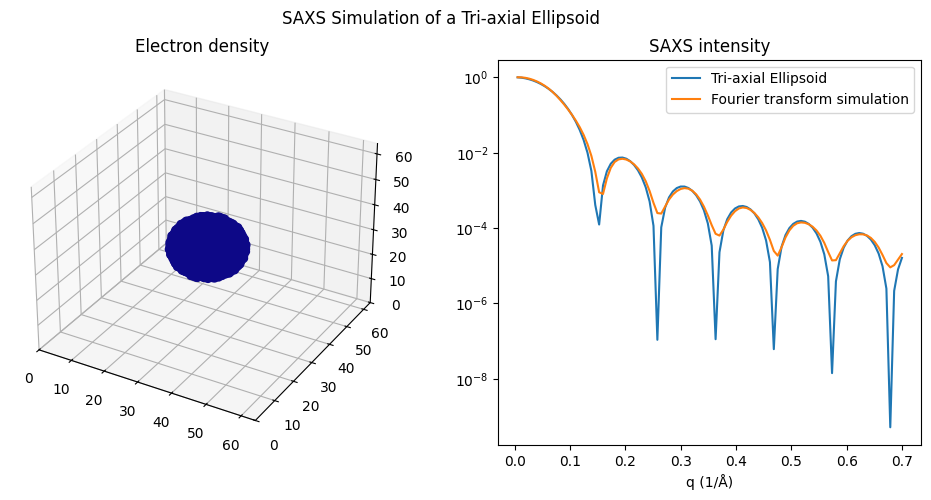

In [5]:
plot_tri_axial_ellipsoid(10, 10, 10)